# Assignment 6: Build and Evaluate Tree Models

Compete in the Multi-class Prediction of Obesity Risk competition (late submission) on Kaggle.com.  You will build four models:  one decision tree, one bagged model, one random forest, and one boosted model.  You will submit them for evaluation.  You must interpret your classification models, provide your code, provide evidence of successful submission to Kaggle.com.   Investigate assumptions.  Interpret all of your findings

# STEP #0: LIBRARIES IMPORT


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import BaggingClassifier,  RandomForestClassifier ,  GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
# Load data
data = pd.read_csv("ObesityDataSet.csv") 

In [3]:
print("\nStatistical Summary:")
display(data.describe(include='all'))


Statistical Summary:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [4]:
# Display the first few rows of the dataset
print("Preview of the Dataset:")
display(data.head())

Preview of the Dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Basic Information about the Dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF         

In [6]:
# Check for Missing Values
print("\nMissing Values Count:")
missing_values = data.isnull().sum()
display(missing_values)


Missing Values Count:


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

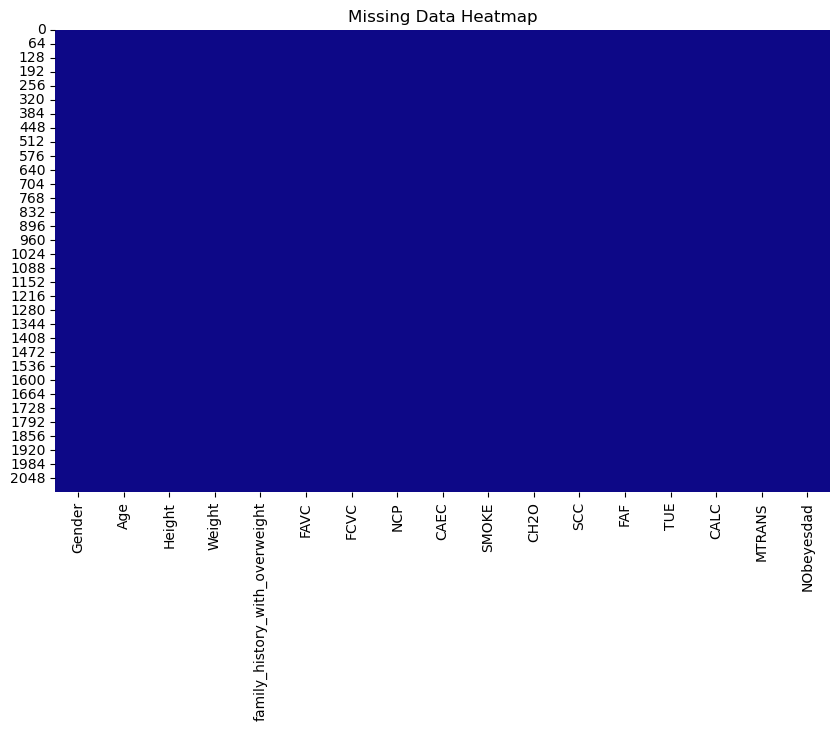

In [7]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
# Check Data Types
print("\nData Types:")
print(data.dtypes)


Data Types:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [9]:
# Analyze Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables Analysis:")
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    display(data[col].value_counts())


Categorical Variables Analysis:

Gender Value Counts:


Gender
Male      1068
Female    1043
Name: count, dtype: int64


family_history_with_overweight Value Counts:


family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


FAVC Value Counts:


FAVC
yes    1866
no      245
Name: count, dtype: int64


CAEC Value Counts:


CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


SMOKE Value Counts:


SMOKE
no     2067
yes      44
Name: count, dtype: int64


SCC Value Counts:


SCC
no     2015
yes      96
Name: count, dtype: int64


CALC Value Counts:


CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


MTRANS Value Counts:


MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


NObeyesdad Value Counts:


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


Numerical Variables Analysis:


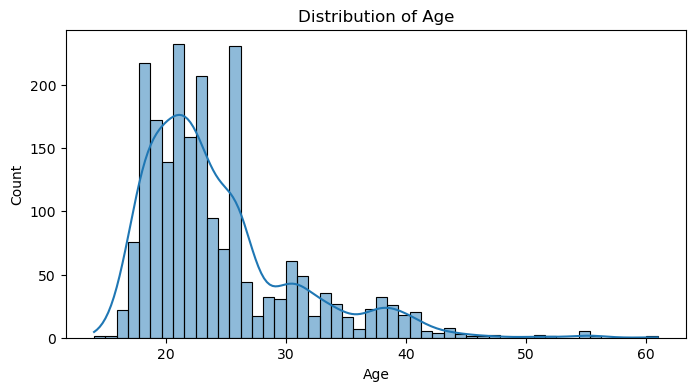

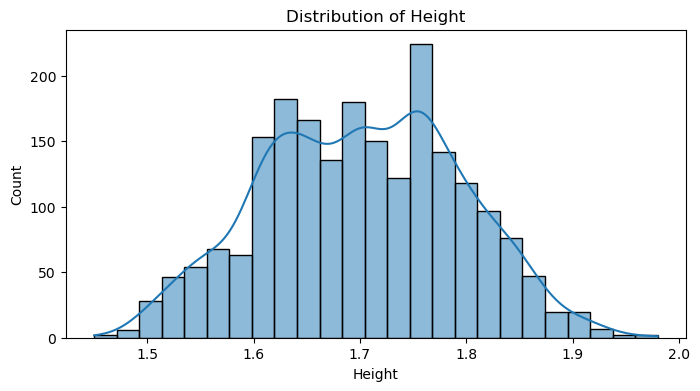

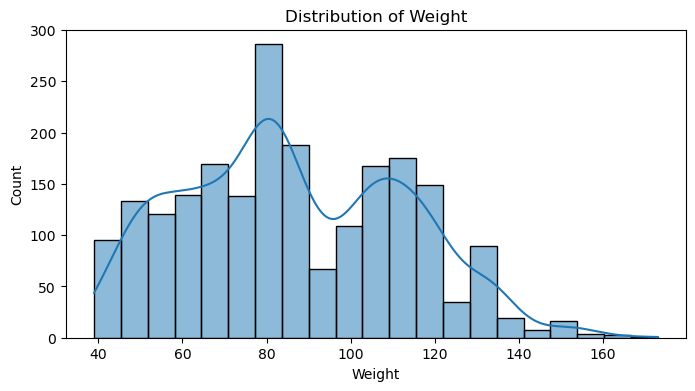

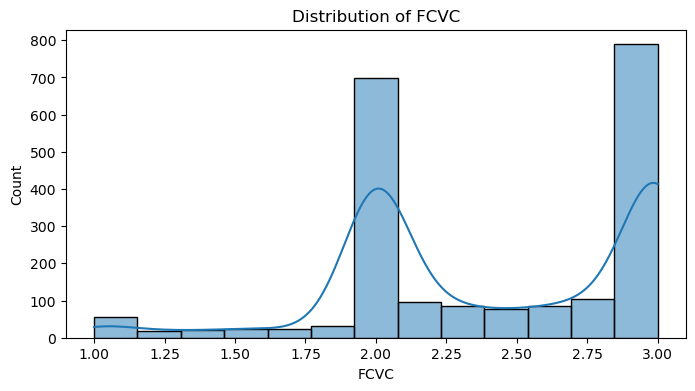

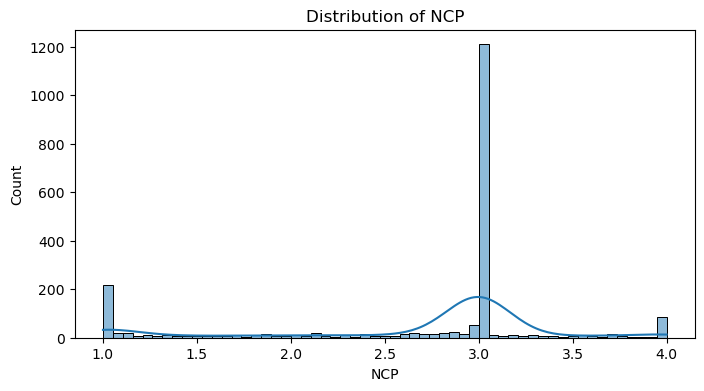

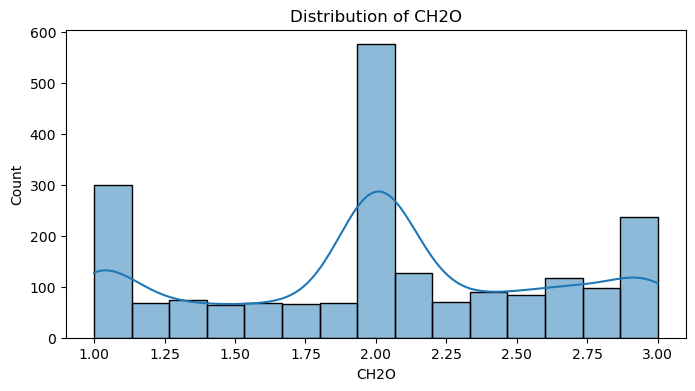

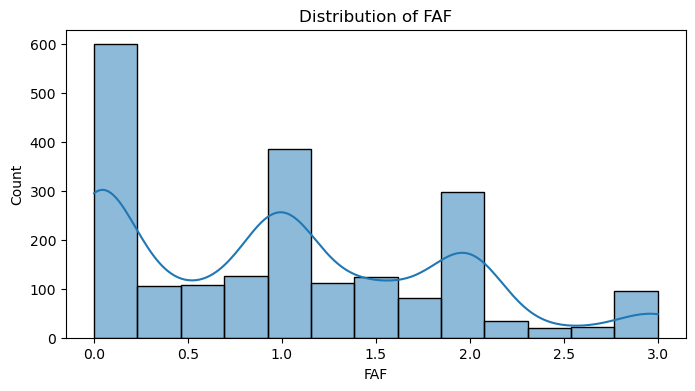

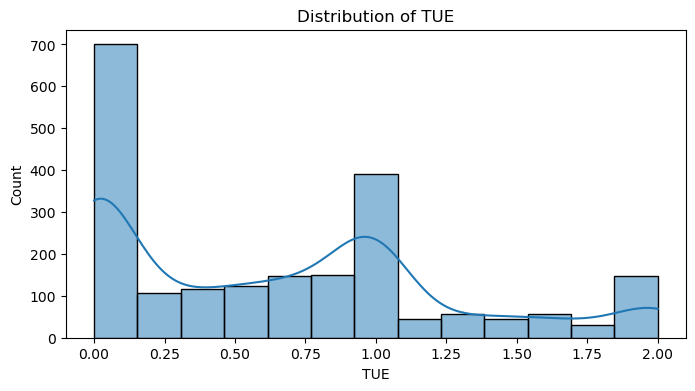

In [10]:
# Analyze Numerical Variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Variables Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Outliers Analysis:


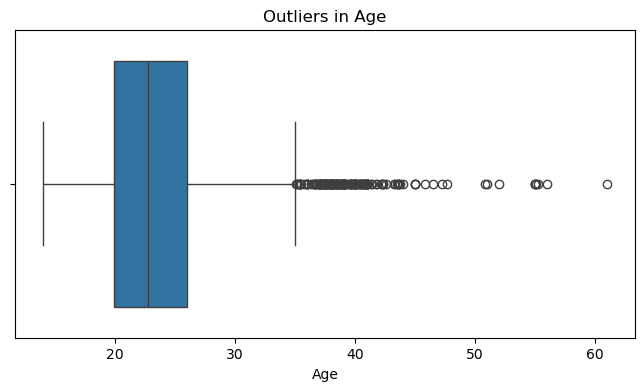

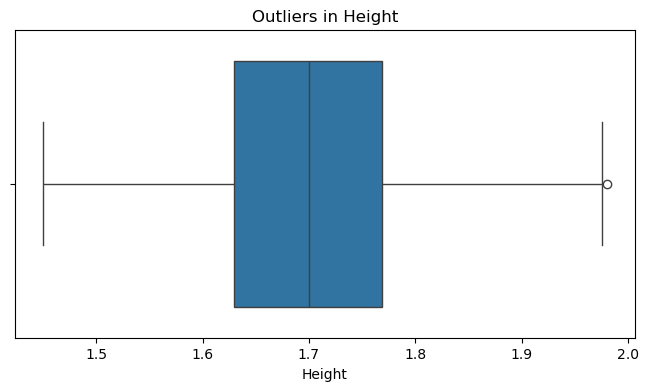

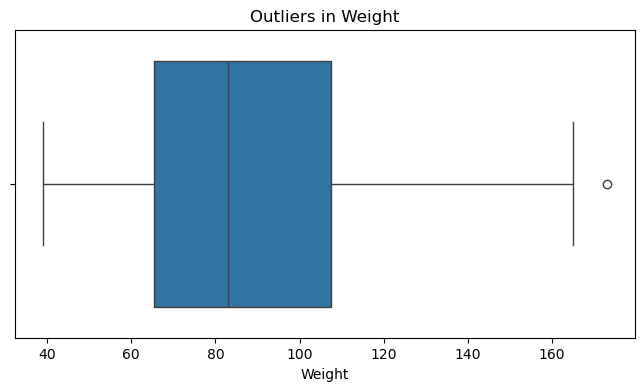

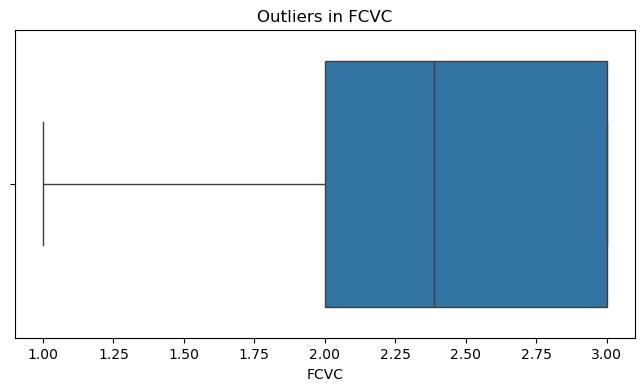

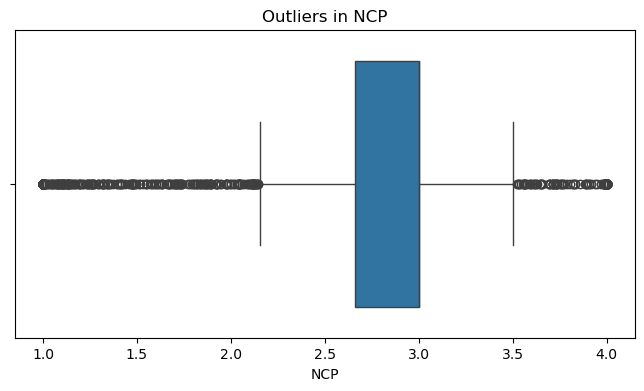

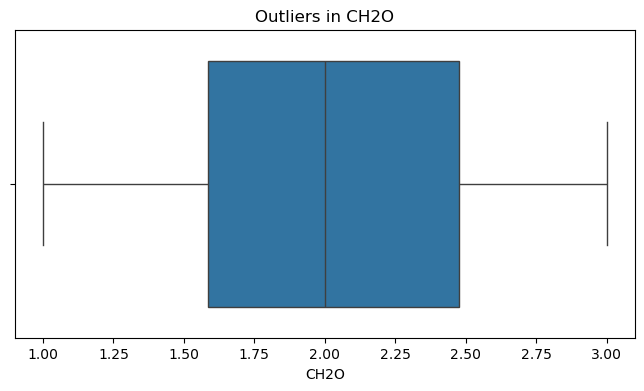

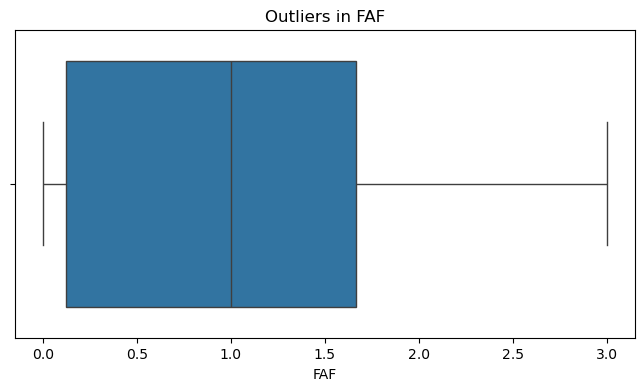

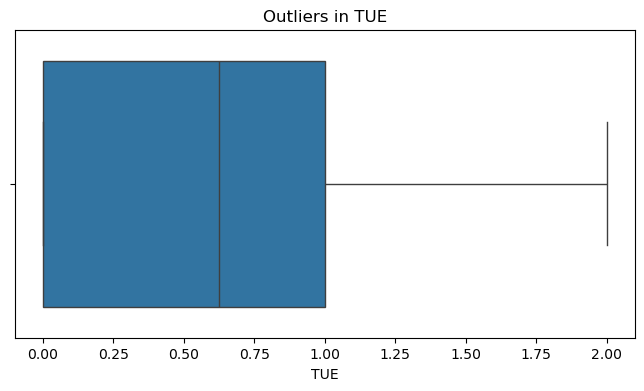

In [11]:
# Check for Outliers
print("\nOutliers Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [12]:
object_cols = data.select_dtypes(include=['object']).columns
Filtered_data = data.drop(columns=object_cols)


Correlation Matrix:


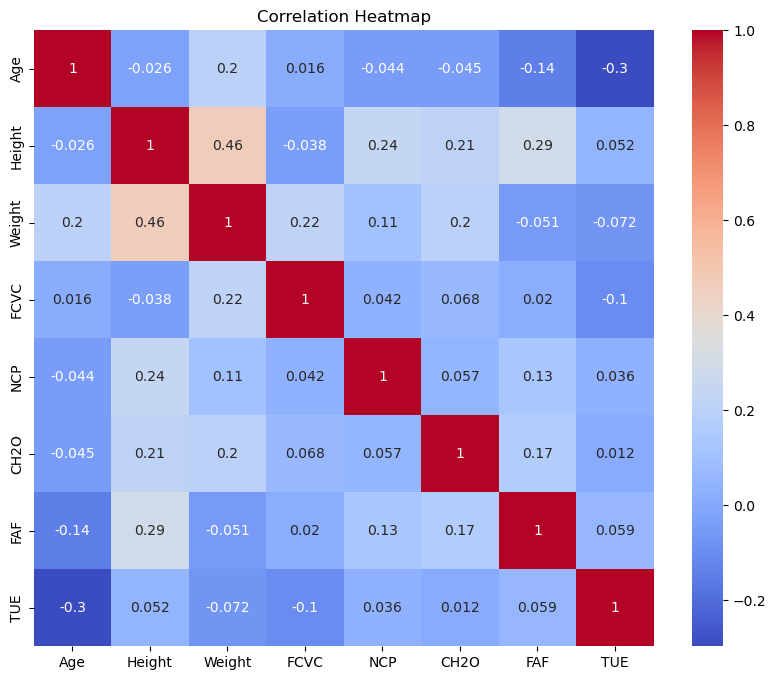

In [13]:
#  Correlation Analysis
print("\nCorrelation Matrix:")
corr_matrix = Filtered_data.corr() # used filtered_data rather that data due to data containing a column with object datatype
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Pairplot for Numerical Variables:


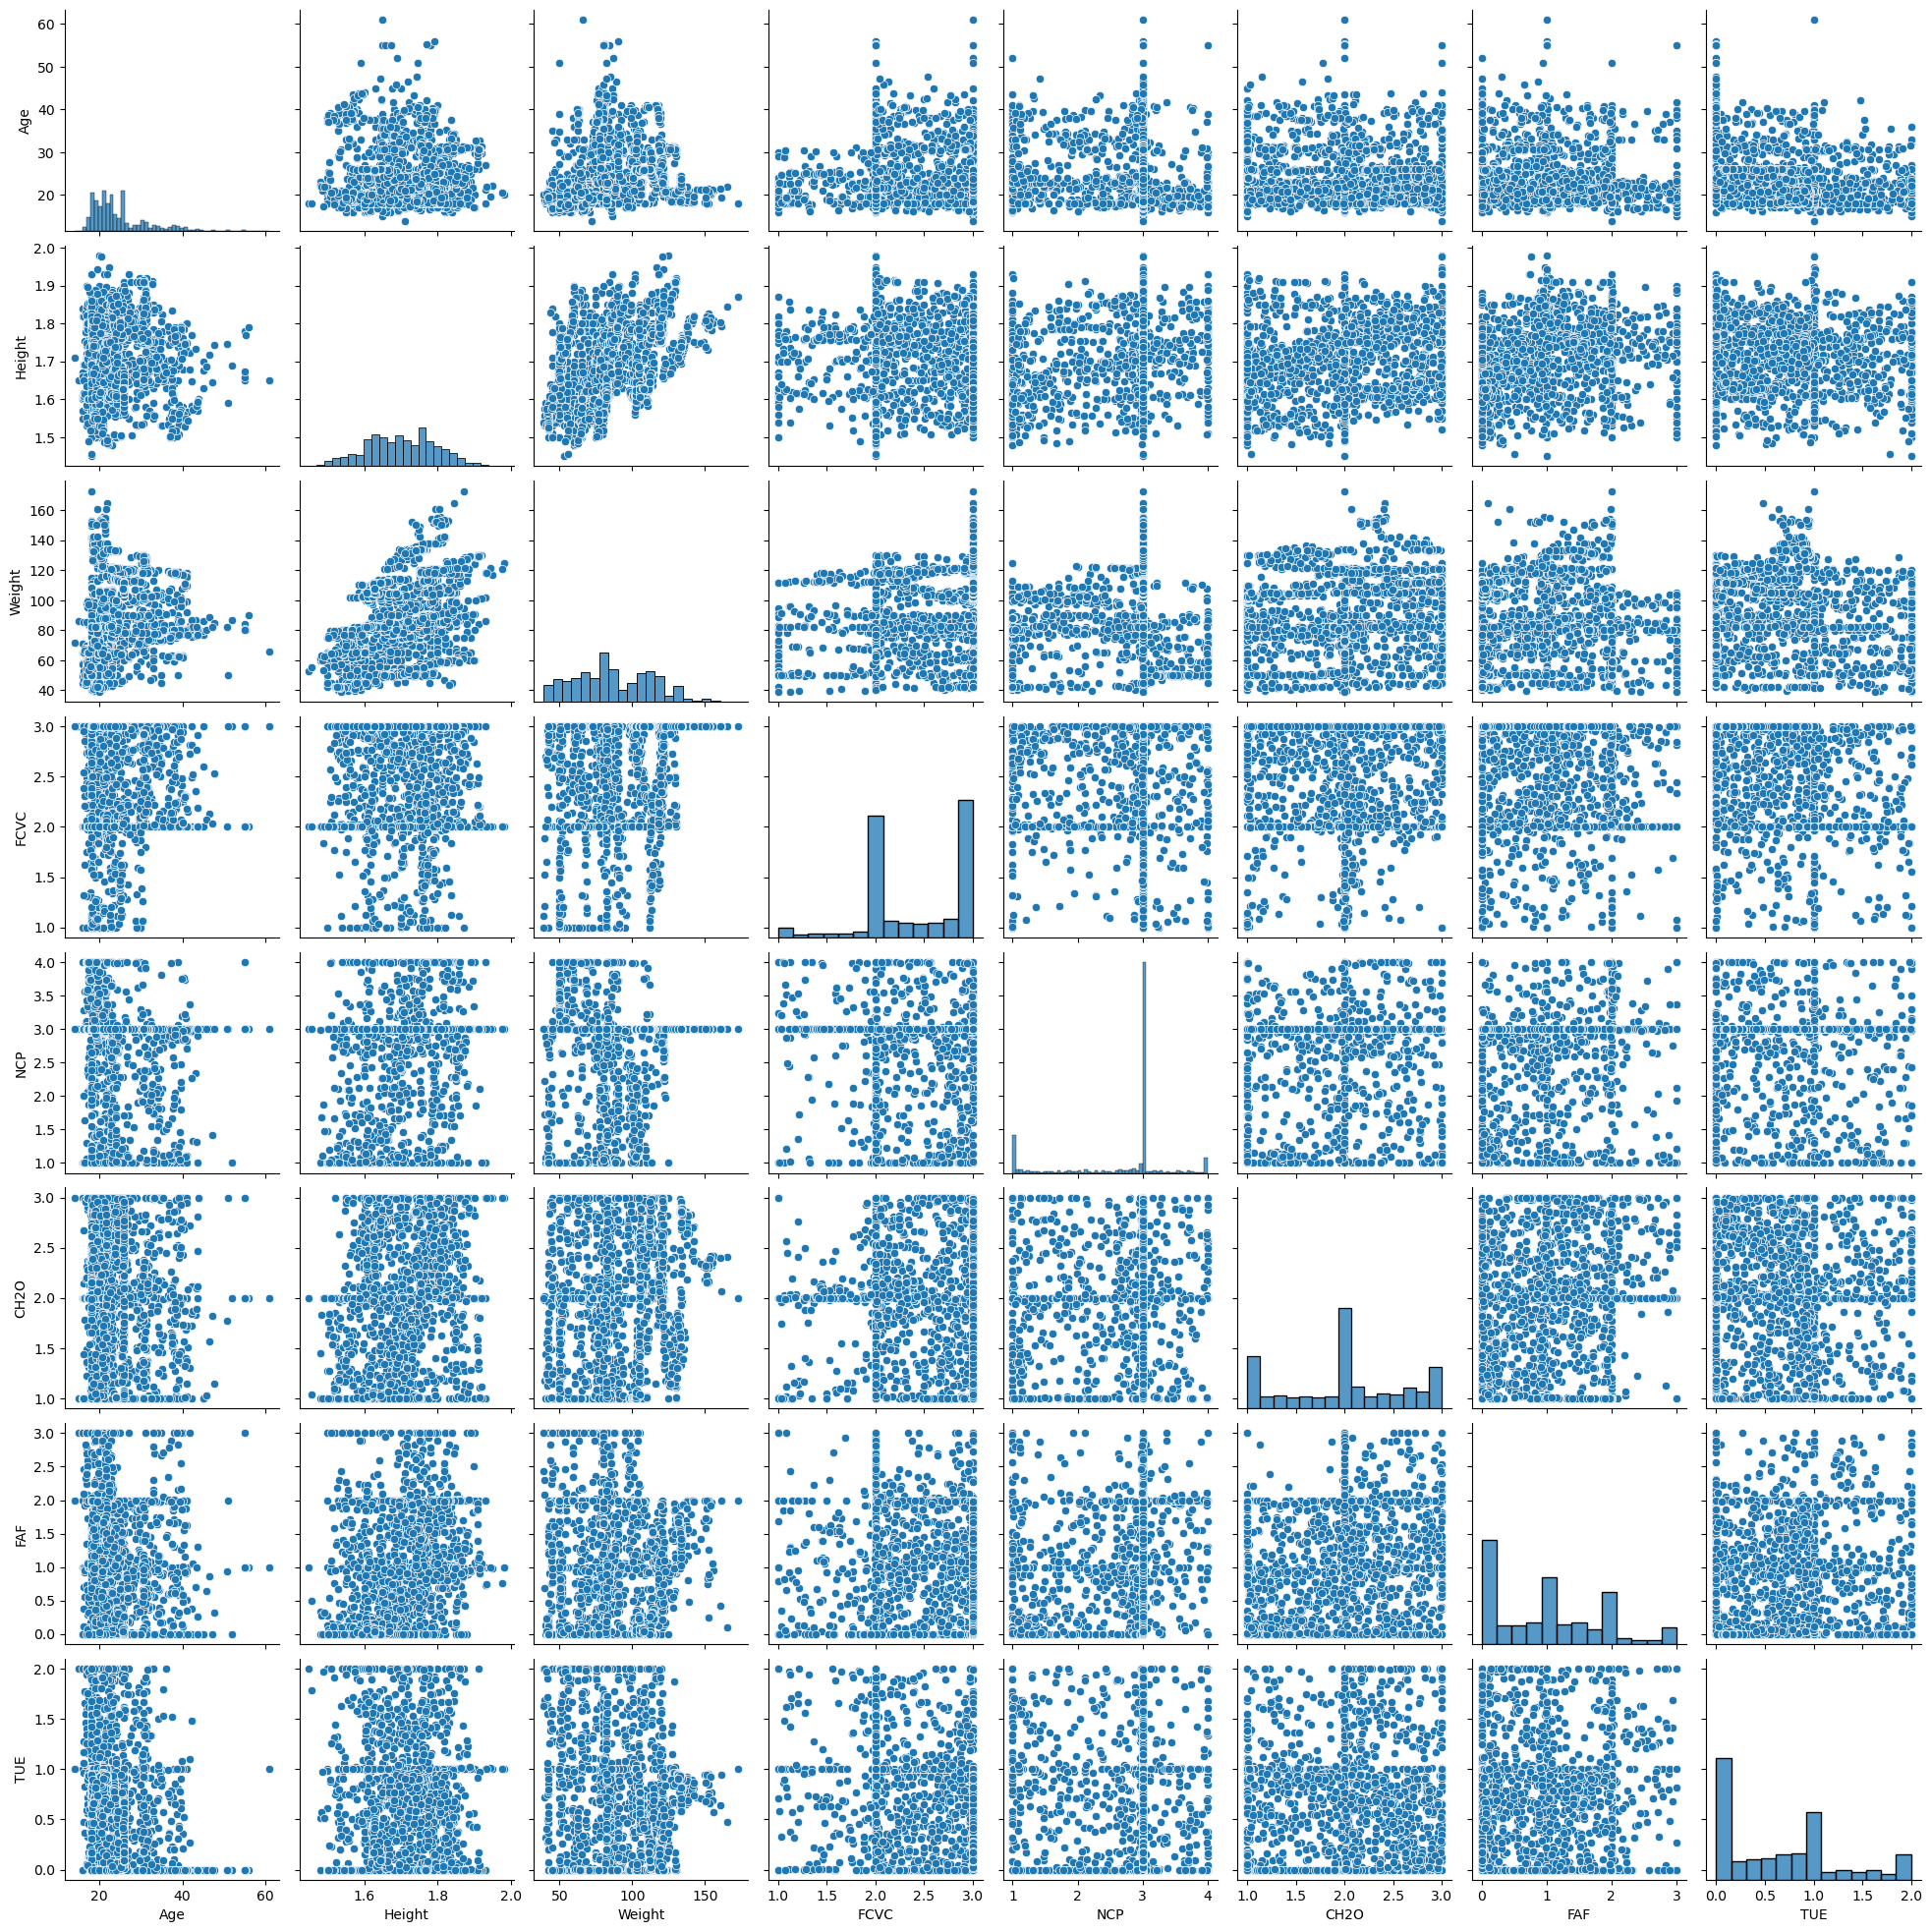

In [14]:
# Relationship Between Variables
print("\nPairplot for Numerical Variables:")
sns.pairplot(data[numerical_cols])
plt.show()

In [15]:
# 1. Load data 
train_data =  pd.read_csv("Data/playground-series-s4e2/train.csv")
test_data = pd.read_csv("Data/playground-series-s4e2/test.csv")

train_data = train_data.drop('id', axis=1)
test_id = test_data ['id']
test_data = test_data.drop('id',axis = 1)

In [16]:
test_id.info


<bound method Series.info of 0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64>

In [17]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [18]:
test_data 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


# Feature Engineering 

In [19]:
categorical_columns = train_data.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [20]:
categorical_columns = test_data.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [21]:
target_dictionary = {'Insufficient_Weight': '0',
                     'Normal_Weight': '1',
                     'Overweight_Level_I': '2',
                      'Overweight_Level_II': '3',
                     'Obesity_Type_I': '4',
                     'Obesity_Type_II': '5',
                     'Obesity_Type_III': '6'
                    }

In [22]:
target_dictionary

{'Insufficient_Weight': '0',
 'Normal_Weight': '1',
 'Overweight_Level_I': '2',
 'Overweight_Level_II': '3',
 'Obesity_Type_I': '4',
 'Obesity_Type_II': '5',
 'Obesity_Type_III': '6'}

In [23]:
train_data['NObeyesdad'] = train_data['NObeyesdad'].replace(target_dictionary).astype('int64')
train_data['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4], dtype=int64)

In [24]:
test_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [25]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,5
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,5
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,3


In [26]:
train_data['MTRANS'].nunique()
train_data['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [27]:
target_dictionary = { 'Bike': '0', 
                         'Walking': '1',
                    'Motorbike': '2',
                       'Automobile' : '3',
                     'Public_Transportation' : '4'                      
                    }

In [28]:
target_dictionary

{'Bike': '0',
 'Walking': '1',
 'Motorbike': '2',
 'Automobile': '3',
 'Public_Transportation': '4'}

In [29]:
train_data['MTRANS'] = train_data['MTRANS'].replace(target_dictionary).astype(int)
train_data['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [30]:
test_data['MTRANS'] = test_data['MTRANS'].replace(target_dictionary).astype(int)
test_data['MTRANS'].unique()

array([4, 3, 1, 0, 2])

In [31]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,4,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,3,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,4,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,4,6
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,4,5
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,4,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,4,5
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,3,3


In [32]:
test_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,4
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,4
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,4
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,4
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,4
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,4
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,4
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,4


In [33]:
train_data['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [34]:
test_data['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [35]:
target_dictionary = { 'Frequently': '0', 
                        'Sometimes' : '1',
                          'no': '2',
                         'Always': '3'
                                    
                    }

In [36]:
target_dictionary

{'Frequently': '0', 'Sometimes': '1', 'no': '2', 'Always': '3'}

In [37]:
train_data['CALC'] = train_data['CALC'].replace(target_dictionary).astype(int)
train_data['CALC'].unique()

array([1, 2, 0])

In [38]:
test_data['CALC'] = test_data['CALC'].replace(target_dictionary).astype(int)
test_data['CALC'].unique()

array([1, 2, 0, 3])

In [39]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,1,4,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,2,3,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,2,4,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,1,4,6
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,1,4,5
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,1,4,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,2,4,5
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,2,3,3


In [40]:
test_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,1,4
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,1,4
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,1,4
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,1,4
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,1,4
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,1,4
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,1,4
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,2,4


In [41]:
categorical_columns = train_data.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC'],
      dtype='object')

In [42]:
train_data =pd.get_dummies(train_data)


In [43]:
train_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [44]:
#drop column only need 1 
train_data = train_data.drop(columns =['Gender_Male','family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no','SMOKE_no' ,'SCC_no'])

In [45]:
train_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,4,3,False,True,False,False,True,False,False,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2,3,1,True,True,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,2,4,0,True,True,False,False,True,False,False,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,4,6,True,True,False,False,True,False,False,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,4,3,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1,4,5,False,True,False,False,True,False,False,False
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1,4,0,False,True,False,True,False,False,False,False
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,2,4,5,False,True,False,False,True,False,False,False
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,2,3,3,False,True,False,False,True,False,False,False


In [46]:
train_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad', 'Gender_Female', 'FAVC_yes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')

In [47]:
train_data.info

<bound method DataFrame.info of              Age    Height      Weight      FCVC       NCP      CH2O  \
0      24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1      18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2      18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3      20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4      31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...          ...       ...         ...       ...       ...       ...   
20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            FAF       TUE  CALC  MTRANS  NObeyesdad  Gender_Female  FAVC_yes  \
0      0.000000  0.9764

In [48]:
categorical_columns_test = test_data.select_dtypes(include = ['object'])
categorical_columns_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC'],
      dtype='object')

In [49]:
test_data =pd.get_dummies(test_data)

In [50]:
test_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [51]:
test_data.info

<bound method DataFrame.info of              Age    Height      Weight      FCVC       NCP      CH2O  \
0      26.899886  1.848294  120.644178  2.938616  3.000000  2.825629   
1      21.000000  1.600000   66.000000  2.000000  1.000000  3.000000   
2      26.000000  1.643355  111.600553  3.000000  3.000000  2.621877   
3      20.979254  1.553127  103.669116  2.000000  2.977909  2.786417   
4      26.000000  1.627396  104.835346  3.000000  3.000000  2.653531   
...          ...       ...         ...       ...       ...       ...   
13835  23.327836  1.721384   78.030383  2.813234  3.000000  1.000000   
13836  29.000000  1.590000   62.000000  3.000000  3.000000  2.000000   
13837  22.935612  1.585547   44.376637  3.000000  2.273740  2.000000   
13838  21.000000  1.620000   53.000000  2.000000  3.000000  2.000000   
13839  26.490926  1.812259  120.980508  2.744994  3.000000  2.205977   

            FAF       TUE  CALC  MTRANS  ...  FAVC_no  FAVC_yes  CAEC_Always  \
0      0.855400  0.0000

In [52]:
test_data = test_data.drop(columns =['Gender_Male','family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no','SMOKE_no' ,'SCC_no'])

In [53]:
test_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1,4,False,True,False,False,True,False,False,False
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,4,True,True,False,False,True,False,False,False
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,4,True,True,False,False,True,False,False,False
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1,4,False,True,False,False,True,False,False,False
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,4,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1,4,False,False,False,False,True,False,False,False
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,4,True,True,False,False,True,False,False,False
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,4,True,True,False,True,False,False,False,False
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2,4,False,True,False,False,True,False,False,False


In [54]:
train_data['BMI_Sqrt'] = ((train_data['Weight']) **.5) / (train_data['Height']**1)
train_data['BMI_Sqrt'].value_counts()

BMI_Sqrt
4.159452    191
5.261336    179
5.420771    148
5.094267    139
5.164568    122
           ... 
6.328291      1
5.715166      1
4.232225      1
6.643650      1
5.983323      1
Name: count, Length: 12609, dtype: int64

In [55]:
test_data['BMI_Sqrt'] = ((test_data['Weight']) **.5) / (test_data['Height']**1)
test_data['BMI_Sqrt'].value_counts()

BMI_Sqrt
4.159452    143
5.420771    122
5.261336    115
5.195153     73
5.094267     70
           ... 
4.221745      1
5.624201      1
6.518665      1
6.020288      1
6.069284      1
Name: count, Length: 8891, dtype: int64

# Correlation Matrix

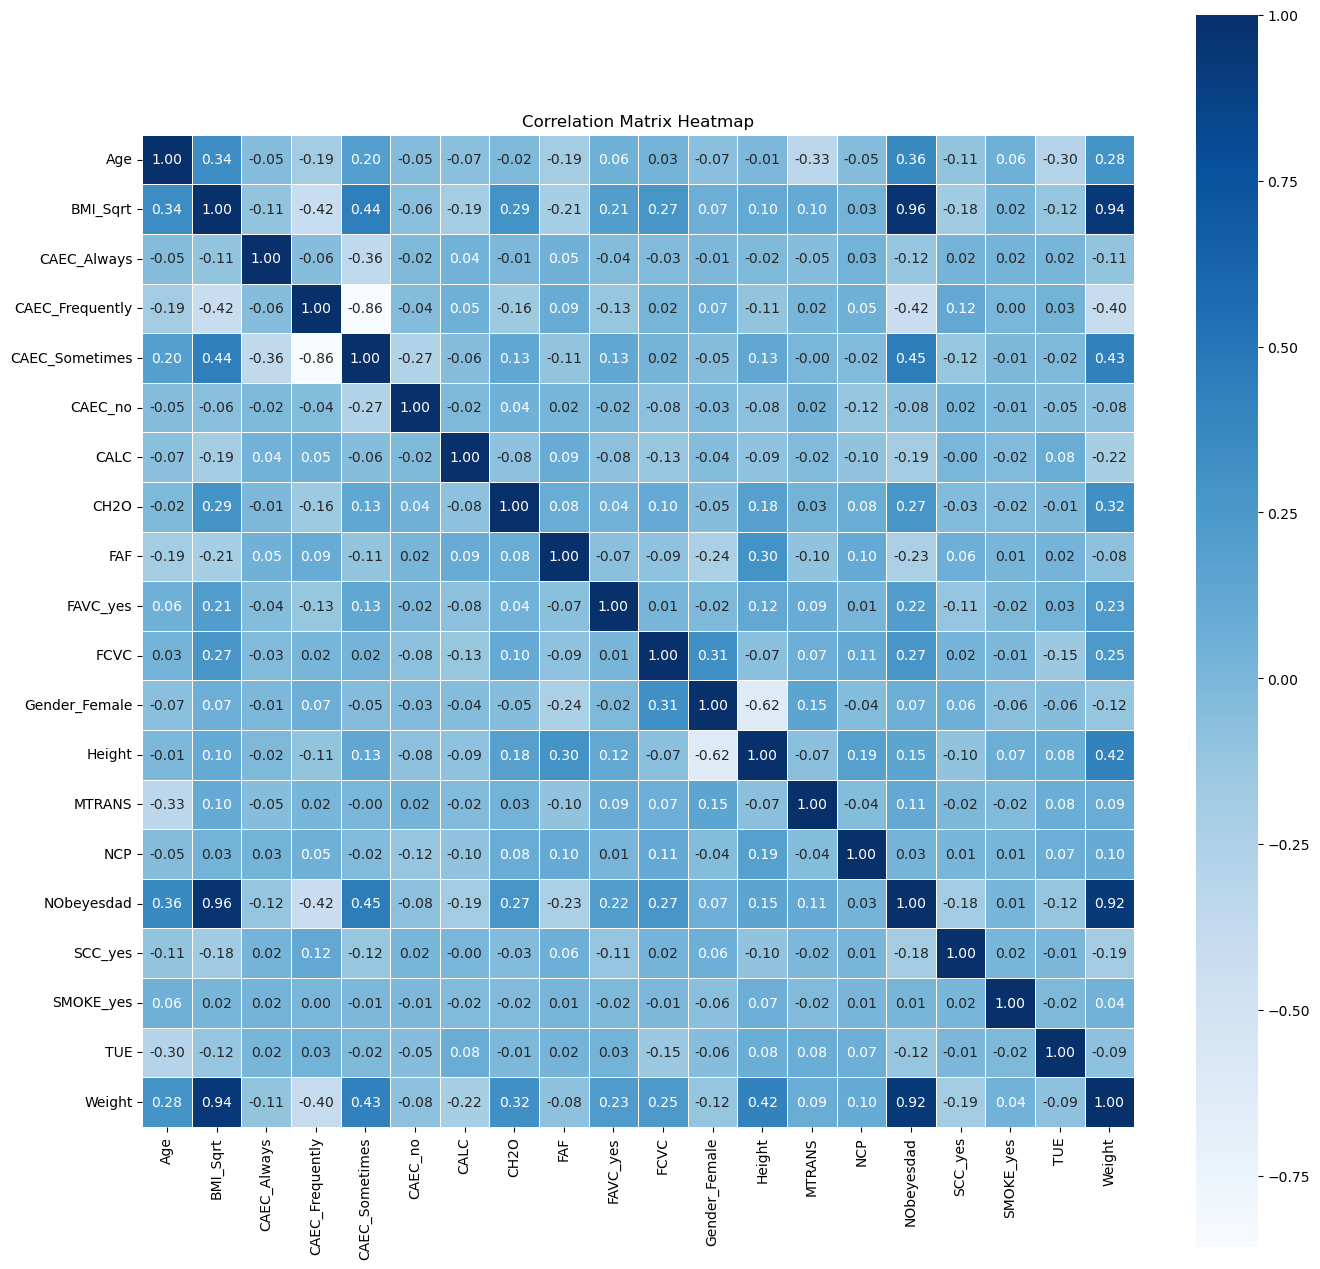

In [56]:
train_data = train_data.astype(float)


corr_matrix = train_data.corr()
#sort the correlation matrix to the column interest
sorted_correlation = corr_matrix['NObeyesdad'].sort_index(ascending = True)

#extract the columns in order of their correlation
correlated_columns = sorted_correlation.index

#create a subset of the correlation matrix
subset_corr_matrix = corr_matrix.loc[correlated_columns, correlated_columns ]

#Plot
plt.figure(figsize=(16,16))
#Heatmap
sns.heatmap(subset_corr_matrix, annot=True, cmap='Blues', linewidths=0.6, fmt=".2f", square=True)

#title
plt.title("Correlation Matrix Heatmap")
#show Plot
plt.show()

In [57]:
test_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,BMI_Sqrt
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1,4,False,True,False,False,True,False,False,False,5.942677
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,4,True,True,False,False,True,False,False,False,5.077524
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,4,True,True,False,False,True,False,False,False,6.428384
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1,4,False,True,False,False,True,False,False,False,6.555680
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,4,True,True,False,False,True,False,False,False,6.291593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1,4,False,False,False,False,True,False,False,False,5.131615
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,4,True,True,False,False,True,False,False,False,4.952206
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,4,True,True,False,True,False,False,False,False,4.201439
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2,4,False,True,False,False,True,False,False,False,4.493895


# Step#3 Create the data and split

In [58]:
# use data split from dataset
# 2. Separate features (X) and target variable (y) for training data
X = train_data.drop(columns=['NObeyesdad'])
y = train_data['NObeyesdad']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
y_train

9958     4.0
7841     0.0
9293     5.0
15209    4.0
16515    3.0
        ... 
11284    2.0
11964    3.0
5390     2.0
860      6.0
15795    4.0
Name: NObeyesdad, Length: 16606, dtype: float64

In [60]:
test_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,BMI_Sqrt
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1,4,False,True,False,False,True,False,False,False,5.942677
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,4,True,True,False,False,True,False,False,False,5.077524
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,4,True,True,False,False,True,False,False,False,6.428384
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1,4,False,True,False,False,True,False,False,False,6.555680
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,4,True,True,False,False,True,False,False,False,6.291593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1,4,False,False,False,False,True,False,False,False,5.131615
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,4,True,True,False,False,True,False,False,False,4.952206
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,4,True,True,False,True,False,False,False,False,4.201439
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2,4,False,True,False,False,True,False,False,False,4.493895


In [61]:
test_id

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

# STEP#4: TRAINING THE MODEL

# Decision Tree

Accuracy on Training set: 0.9994700838231043
Confusion Matrix:
 [[2523    0    0    0    0    0    0]
 [   3 3079    0    0    0    0    0]
 [   0    3 2424    0    0    0    0]
 [   0    0    2 2520    0    0    0]
 [   1    0    2    0 2907    0    0]
 [   0    0    0    0    0 3248    0]
 [   0    0    0    0    0    0 4046]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2523
         1.0       1.00      1.00      1.00      3082
         2.0       1.00      1.00      1.00      2427
         3.0       1.00      1.00      1.00      2522
         4.0       1.00      1.00      1.00      2910
         5.0       1.00      1.00      1.00      3248
         6.0       1.00      1.00      1.00      4046

    accuracy                           1.00     20758
   macro avg       1.00      1.00      1.00     20758
weighted avg       1.00      1.00      1.00     20758



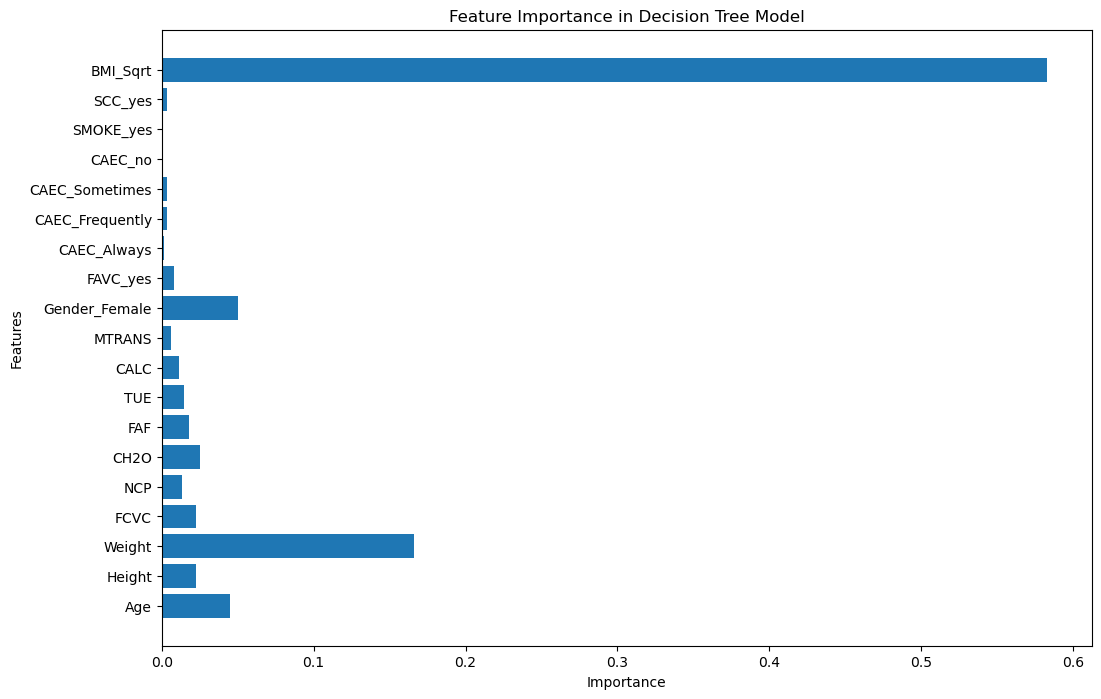

In [62]:

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 4. Train the model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

# 5. Make predictions on test set
y_pred = decision_tree.predict(test_data)
# 6.1 Model Performance Evaluation on Training set (if you have the actual labels for a validation set, use it instead)
y_train_pred = decision_tree.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print(f'Accuracy on Training set: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# 6.2 Feature Importance
feature_importance = decision_tree.feature_importances_
plt.figure(figsize=(12, 8))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Naive Bayes',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('DecisionTreeClassifiersubmission.csv', index=False)



# Bagged Model

Accuracy on Training set: 0.9907023798053762
Confusion Matrix:
 [[2517    6    0    0    0    0    0]
 [  37 3033   11    1    0    0    0]
 [   2   32 2376   14    3    0    0]
 [   0   11   19 2487    5    0    0]
 [   1    0   11   19 2873    5    1]
 [   0    0    0    3   10 3235    0]
 [   0    0    0    0    1    1 4044]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2523
         1.0       0.98      0.98      0.98      3082
         2.0       0.98      0.98      0.98      2427
         3.0       0.99      0.99      0.99      2522
         4.0       0.99      0.99      0.99      2910
         5.0       1.00      1.00      1.00      3248
         6.0       1.00      1.00      1.00      4046

    accuracy                           0.99     20758
   macro avg       0.99      0.99      0.99     20758
weighted avg       0.99      0.99      0.99     20758



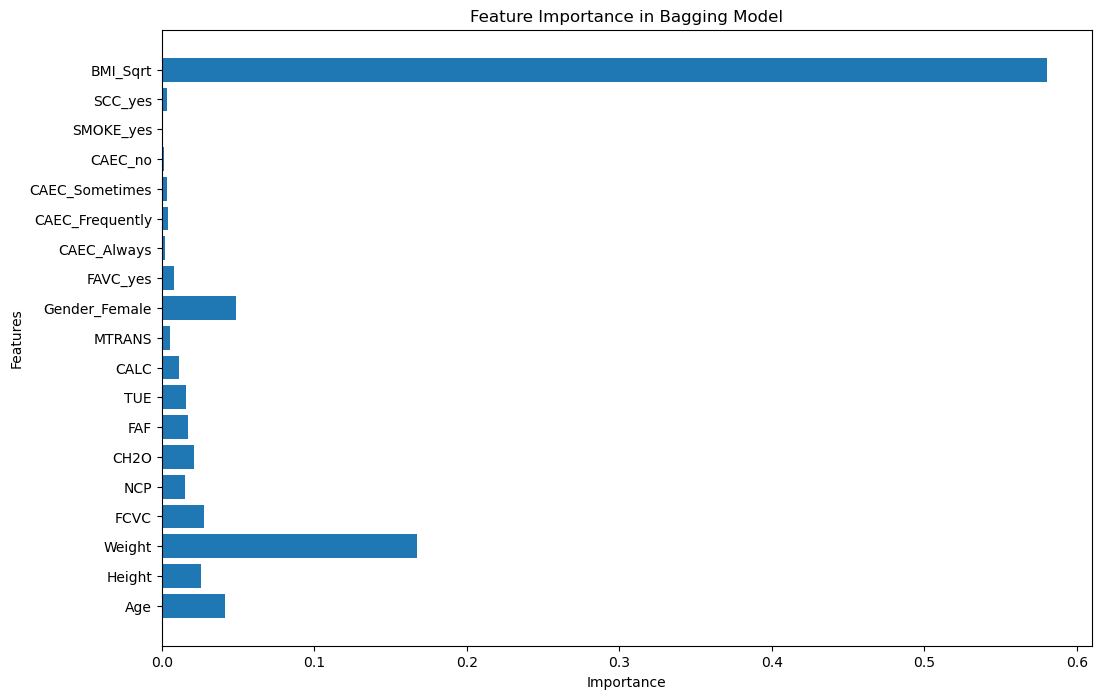

In [63]:

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 4. Train the model
# Create the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier()

# Create the BaggingClassifier with 10 estimators
model = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


# 5. Make predictions on test set
y_pred = model.predict(test_data)
# 6.1 Model Performance Evaluation on Training set (if you have the actual labels for a validation set, use it instead)
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print(f'Accuracy on Training set: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Extract individual trees
individual_trees = model.estimators_

# 6.2 Feature Importance
# Compute average feature importances
feature_importances = np.mean([tree.feature_importances_ for tree in individual_trees], axis=0)

plt.figure(figsize=(12, 8))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Bagging Model')
plt.show()

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Naive Bayes',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('BaggedModelsubmission.csv', index=False)



#  Random Forest Classifier

Accuracy on Training set: 0.9994700838231043
Confusion Matrix:
 [[2523    0    0    0    0    0    0]
 [   3 3078    1    0    0    0    0]
 [   0    2 2424    1    0    0    0]
 [   0    0    1 2521    0    0    0]
 [   1    0    2    0 2907    0    0]
 [   0    0    0    0    0 3248    0]
 [   0    0    0    0    0    0 4046]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2523
         1.0       1.00      1.00      1.00      3082
         2.0       1.00      1.00      1.00      2427
         3.0       1.00      1.00      1.00      2522
         4.0       1.00      1.00      1.00      2910
         5.0       1.00      1.00      1.00      3248
         6.0       1.00      1.00      1.00      4046

    accuracy                           1.00     20758
   macro avg       1.00      1.00      1.00     20758
weighted avg       1.00      1.00      1.00     20758



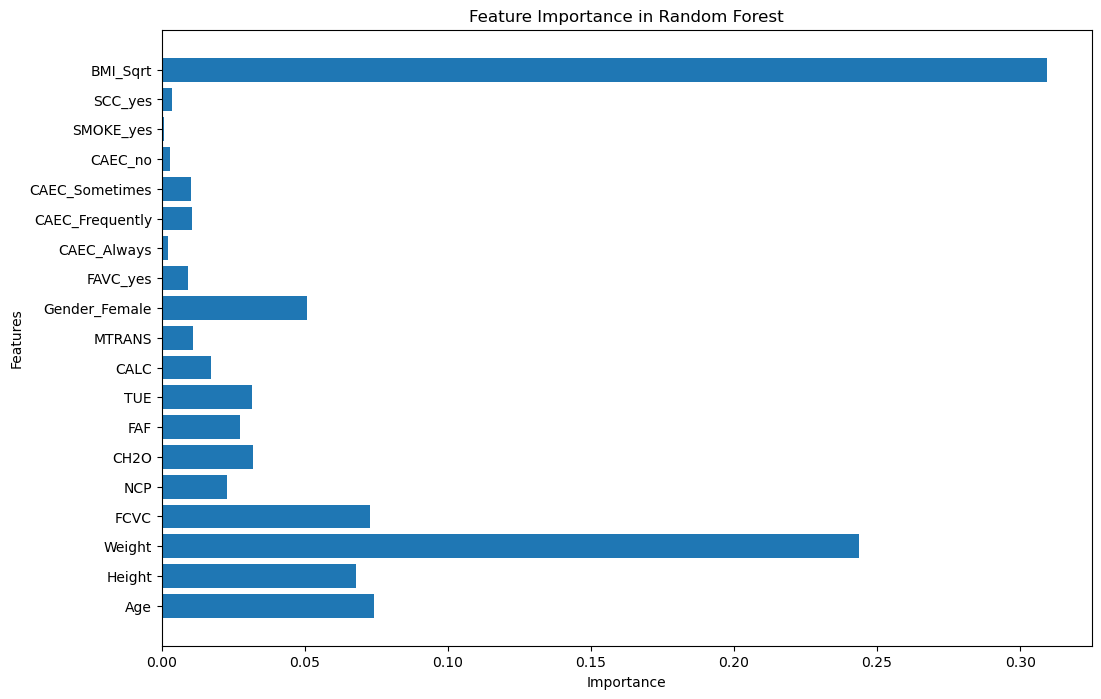

In [64]:

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 4. Train the model
# Create a Random Forest Classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# 5. Make predictions on test set
y_pred = rf_classifier.predict(test_data)
# 6.1 Model Performance Evaluation on Training set (if you have the actual labels for a validation set, use it instead)
y_train_pred = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print(f'Accuracy on Training set: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Extract individual trees
individual_trees = rf_classifier.estimators_

# 6.2 Feature Importance
# Compute average feature importances
feature_importances = np.mean([tree.feature_importances_ for tree in individual_trees], axis=0)

plt.figure(figsize=(12, 8))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Naive Bayes',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('RandomForestClassifier.csv', index=False)


# Gradient Boosting Classifier 

Accuracy on Training set: 0.9172849022063783
Confusion Matrix:
 [[2396  117    7    2    1    0    0]
 [ 149 2769  137   20    7    0    0]
 [  14  195 1916  262   40    0    0]
 [   0   41  198 2116  153   13    1]
 [   2    3   52  155 2620   73    5]
 [   2    0    1   15   47 3183    0]
 [   1    0    2    0    0    2 4041]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2523
         1.0       0.89      0.90      0.89      3082
         2.0       0.83      0.79      0.81      2427
         3.0       0.82      0.84      0.83      2522
         4.0       0.91      0.90      0.91      2910
         5.0       0.97      0.98      0.98      3248
         6.0       1.00      1.00      1.00      4046

    accuracy                           0.92     20758
   macro avg       0.91      0.91      0.91     20758
weighted avg       0.92      0.92      0.92     20758



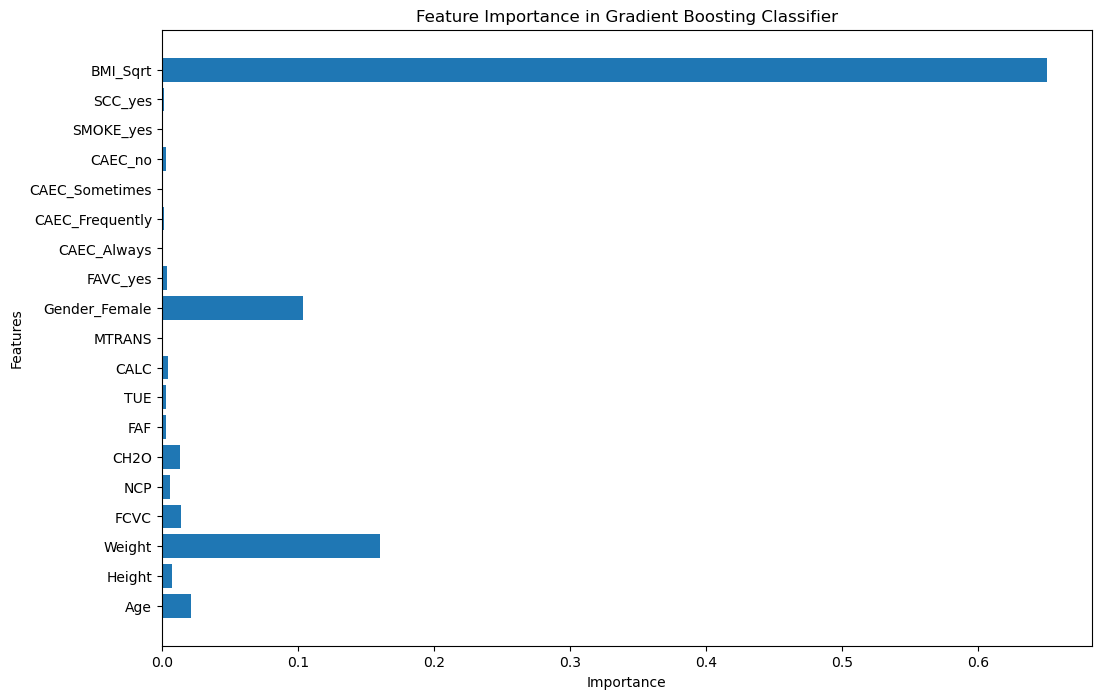

In [65]:

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 4. Train the model
# Create a Gradient Boosting Classifier with default parameters
gb_classifier = GradientBoostingClassifier(random_state=42) 

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# 5. Make predictions on test set
y_pred = gb_classifier.predict(test_data)
# 6.1 Model Performance Evaluation on Training set (if you have the actual labels for a validation set, use it instead)
y_train_pred = gb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
print(f'Accuracy on Training set: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_train, y_train_pred))



# 6.2 Feature Importance
feature_importances = gb_classifier.feature_importances_

plt.figure(figsize=(12, 8))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Naive Bayes',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('GradientBoostingClassifier.csv', index=False)

# Regularized Regression

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 4. Train the models with regularized regression
# L1 Regularized Logistic Regression (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train, y_train)

# L2 Regularized Logistic Regression (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions with Lasso model
y_pred_lasso = lasso_model.predict(test_data)

# Make predictions with Ridge model
y_pred_ridge = ridge_model.predict(test_data)

# 5. Model Performance Evaluation on Training set
# Lasso
y_train_pred_lasso = lasso_model.predict(X_train)
accuracy_lasso = accuracy_score(y_train, y_train_pred_lasso)
conf_matrix_lasso = confusion_matrix(y_train, y_train_pred_lasso)
print(f'Lasso Accuracy on Training set: {accuracy_lasso}')
print("Lasso Confusion Matrix:\n", conf_matrix_lasso)
print("Lasso Classification Report:\n", classification_report(y_train, y_train_pred_lasso))

# Ridge
y_train_pred_ridge = ridge_model.predict(X_train)
accuracy_ridge = accuracy_score(y_train, y_train_pred_ridge)
conf_matrix_ridge = confusion_matrix(y_train, y_train_pred_ridge)
print(f'Ridge Accuracy on Training set: {accuracy_ridge}')
print("Ridge Confusion Matrix:\n", conf_matrix_ridge)
print("Ridge Classification Report:\n", classification_report(y_train, y_train_pred_ridge))




Lasso Accuracy on Training set: 0.7634646883129396
Lasso Confusion Matrix:
 [[2354  154    8    5    1    1    0]
 [ 339 2003  362  307   71    0    0]
 [  14  514 1108  482  309    0    0]
 [   0  165  416 1160  745   30    6]
 [   3   39  132  297 2037  362   40]
 [   0    0    5   24   70 3148    1]
 [   1    3    0    0    0    4 4038]]
Lasso Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2523
         1.0       0.70      0.65      0.67      3082
         2.0       0.55      0.46      0.50      2427
         3.0       0.51      0.46      0.48      2522
         4.0       0.63      0.70      0.66      2910
         5.0       0.89      0.97      0.93      3248
         6.0       0.99      1.00      0.99      4046

    accuracy                           0.76     20758
   macro avg       0.73      0.74      0.73     20758
weighted avg       0.75      0.76      0.76     20758

Ridge Accuracy on Training set